In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
spec = pd.read_csv('C:/data/spec_count추가.csv', encoding = 'cp949')


KeyboardInterrupt



In [ ]:
loan = pd.read_csv('C:/data/loan_result.csv')

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

# KCB신용등급 추가

In [ ]:
spec.loc[(spec['credit_score'] <= 334),'KCB_rank'] = 10
spec.loc[(334< spec['credit_score']) &(spec['credit_score']<= 453),'KCB_rank'] = 9
spec.loc[(453< spec['credit_score']) &(spec['credit_score']<= 529),'KCB_rank'] = 8
spec.loc[(529< spec['credit_score']) &(spec['credit_score']<= 629),'KCB_rank'] = 7
spec.loc[(629< spec['credit_score']) &(spec['credit_score']<= 697),'KCB_rank'] = 6
spec.loc[(697< spec['credit_score']) &(spec['credit_score']<= 767),'KCB_rank'] = 5
spec.loc[(767< spec['credit_score']) &(spec['credit_score']<= 831),'KCB_rank'] = 4
spec.loc[(831< spec['credit_score']) &(spec['credit_score'] <= 890),'KCB_rank'] = 3
spec.loc[(890< spec['credit_score']) &(spec['credit_score'] <= 941),'KCB_rank'] = 2
spec.loc[(941< spec['credit_score']),'KCB_rank'] = 1

# 신용정보를 포함한 소득등급

In [ ]:
spec['yearly_income'] = spec['yearly_income'] - 0.10*spec['existing_loan_amt']
spec['yearly_income']

In [7]:
spec.loc[(spec['yearly_income'] <= 12000000),'income_ranking'] = 1
spec.loc[(12000000< spec['yearly_income']) &(spec['yearly_income']<= 24000000),'income_ranking'] = 2
spec.loc[(24000000< spec['yearly_income']) &(spec['yearly_income']<= 36000000),'income_ranking'] = 3
spec.loc[(36000000< spec['yearly_income']) &(spec['yearly_income']<= 48000000),'income_ranking'] = 4
spec.loc[(48000000< spec['yearly_income']) &(spec['yearly_income']<= 60000000),'income_ranking'] = 5
spec.loc[(60000000< spec['yearly_income']) &(spec['yearly_income']<= 72000000),'income_ranking'] = 6
spec.loc[(72000000< spec['yearly_income']) &(spec['yearly_income']<= 84000000),'income_ranking'] = 7
spec.loc[(84000000< spec['yearly_income']) &(spec['yearly_income'] <= 96000000),'income_ranking'] = 8
spec.loc[(96000000< spec['yearly_income']) &(spec['yearly_income'] <= 108000000),'income_ranking'] = 9
spec.loc[(108000000< spec['yearly_income']),'income_ranking'] = 10 

In [8]:
##houseown기준 등급 세분화##
spec.loc[(spec['houseown_type'] == '자가')|(spec['houseown_type'] == '배우자'),'income_ranking'] = spec['income_ranking']+1

In [9]:
##houseown기준 등급 세분화##
spec.loc[(spec['rehab_group'] == 'B'),'income_ranking'] = spec['income_ranking']-2
spec.loc[(spec['rehab_group'] == 'C'),'income_ranking'] = spec['income_ranking']-1

In [10]:
##employment_type기준 등급 세분화##
spec.loc[(spec['employment_type'] == '일용직'),'income_ranking'] = spec['income_ranking']-1
spec.loc[(spec['employment_type'] == '계약직'),'income_ranking'] = spec['income_ranking']-1

In [11]:
spec.loc[(spec['income_ranking'] < 1),'income_ranking'] = 1
spec.loc[(spec['income_ranking'] > 10),'income_ranking'] = 10

# yearly_income 최대값 조정

In [12]:
income_max = spec[(spec['yearly_income'] > 100000000)]
income_max_index = income_max.index
spec.loc[income_max_index , ['yearly_income']] = 100000000

# desired_amount 최대값 조정

In [13]:
desired_amount_max = spec[(spec['desired_amount'] > 1000000000)]

desired_amount_max_index = desired_amount_max.index

spec.loc[desired_amount_max_index , ['desired_amount']] = 1000000000

# existing_loan_cnt 최대값 조정

In [14]:
existing_loan_cnt_max = spec[(spec['existing_loan_cnt'] > 20)]

existing_loan_cnt_max_index = existing_loan_cnt_max.index

spec.loc[existing_loan_cnt_max_index , ['existing_loan_cnt']] = 20

# SPEC데이터 파생변수 생성

## credit_score

### employment_type별 credit_score

In [19]:
spec_em = spec.groupby(['employment_type'])[['credit_score']].agg(['mean', 'std'])
spec_em = spec_em.reset_index()
spec_em

employment_type credit_score          
                          mean       std
0             ETC    641.92145 125.15182
1             계약직    631.22162 117.55571
2             일용직    620.66894 117.87085
3             정규직    641.50653 125.24219

In [20]:
spec_em.columns = ['_em_'.join(x) for x in spec_em.columns.ravel()]
spec_em

,employment_type_em_,credit_score_em_mean,credit_score_em_std
0,ETC,641.92145,125.15182
1,계약직,631.22162,117.55571
2,일용직,620.66894,117.87085
3,정규직,641.50653,125.24219


In [21]:
spec_em = spec_em.rename(columns = {'employment_type_em_': 'employment_type'})

In [22]:
spec = pd.merge(left=spec,right=spec_em, how='left', on=['employment_type'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,Month,app_count,birth_year,gender,rehab_group,employed_time,KCB_rank,income_ranking,credit_score_em_mean,credit_score_em_std
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,3,1,1974.00000,M,D,0,7.00000,1.00000,641.92145,125.15182
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,3,1,1997.00000,M,D,1,5.00000,1.00000,620.66894,117.87085
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,3,1,1997.00000,M,D,13,7.00000,1.00000,641.92145,125.15182
3,672433,231989,2022-03-01,540.00000,25700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,3,1,1978.00000,F,D,2,7.00000,3.00000,641.50653,125.24219
4,2136071,622446,2022-03-01,550.00000,45700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,3,1,1986.00000,M,D,129,7.00000,4.00000,641.50653,125.24219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,15600000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,...,6,17,1989.00000,M,A,0,6.00000,2.00000,641.50653,125.24219
1394122,118253,668486,2022-06-01,630.00000,22400000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,...,6,2,1958.00000,F,A,34,6.00000,2.00000,641.92145,125.15182
1394123,725612,361690,2022-06-01,690.00000,88500000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,...,6,1,1979.00000,M,A,231,6.00000,8.00000,641.50653,125.24219
1394124,1662439,258755,2022-06-01,680.00000,36300000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,...,6,3,1994.00000,M,B,1,6.00000,2.00000,641.92145,125.15182


In [23]:
del(spec_em)

### houseown_type별 credit_score

In [24]:
spec_hm = spec.groupby(['houseown_type'])[['credit_score']].agg(['mean', 'std'])
spec_hm = spec_hm.reset_index()
spec_hm

houseown_type credit_score          
                        mean       std
0        기타가족소유    623.71892 112.72006
1           배우자    604.99727 100.86527
2            자가    680.60714 131.88547
3           전월세    635.09647 125.70997

In [25]:
spec_hm.columns = ['_hm_'.join(x) for x in spec_hm.columns.ravel()]
spec_hm

,houseown_type_hm_,credit_score_hm_mean,credit_score_hm_std
0,기타가족소유,623.71892,112.72006
1,배우자,604.99727,100.86527
2,자가,680.60714,131.88547
3,전월세,635.09647,125.70997


In [26]:
spec_hm = spec_hm.rename(columns = {'houseown_type_hm_': 'houseown_type'})

In [27]:
spec = pd.merge(left=spec,right=spec_hm, how='left', on=['houseown_type'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,birth_year,gender,rehab_group,employed_time,KCB_rank,income_ranking,credit_score_em_mean,credit_score_em_std,credit_score_hm_mean,credit_score_hm_std
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,1974.00000,M,D,0,7.00000,1.00000,641.92145,125.15182,635.09647,125.70997
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,1997.00000,M,D,1,5.00000,1.00000,620.66894,117.87085,623.71892,112.72006
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,1997.00000,M,D,13,7.00000,1.00000,641.92145,125.15182,623.71892,112.72006
3,672433,231989,2022-03-01,540.00000,25700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,1978.00000,F,D,2,7.00000,3.00000,641.50653,125.24219,635.09647,125.70997
4,2136071,622446,2022-03-01,550.00000,45700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,1986.00000,M,D,129,7.00000,4.00000,641.50653,125.24219,635.09647,125.70997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,15600000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,...,1989.00000,M,A,0,6.00000,2.00000,641.50653,125.24219,635.09647,125.70997
1394122,118253,668486,2022-06-01,630.00000,22400000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,...,1958.00000,F,A,34,6.00000,2.00000,641.92145,125.15182,623.71892,112.72006
1394123,725612,361690,2022-06-01,690.00000,88500000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,...,1979.00000,M,A,231,6.00000,8.00000,641.50653,125.24219,635.09647,125.70997
1394124,1662439,258755,2022-06-01,680.00000,36300000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,...,1994.00000,M,B,1,6.00000,2.00000,641.92145,125.15182,635.09647,125.70997


In [28]:
del(spec_hm)

### rehap_group별 credit_score

In [29]:
spec_rh = spec.groupby(['rehab_group'])[['credit_score']].agg(['mean', 'std'])
spec_rh = spec_rh.reset_index()
spec_rh

rehab_group credit_score          
                      mean       std
0           A    644.00504 123.41245
1           B    632.48283 133.27853
2           C    511.57988 245.38895
3           D    639.72115 122.16499

In [30]:
spec_rh.columns = ['_rh_'.join(x) for x in spec_rh.columns.ravel()]
spec_rh

,rehab_group_rh_,credit_score_rh_mean,credit_score_rh_std
0,A,644.00504,123.41245
1,B,632.48283,133.27853
2,C,511.57988,245.38895
3,D,639.72115,122.16499


In [31]:
spec_rh = spec_rh.rename(columns = {'rehab_group_rh_': 'rehab_group'})

In [32]:
spec = pd.merge(left=spec,right=spec_rh, how='left', on=['rehab_group'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,rehab_group,employed_time,KCB_rank,income_ranking,credit_score_em_mean,credit_score_em_std,credit_score_hm_mean,credit_score_hm_std,credit_score_rh_mean,credit_score_rh_std
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,D,0,7.00000,1.00000,641.92145,125.15182,635.09647,125.70997,639.72115,122.16499
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,D,1,5.00000,1.00000,620.66894,117.87085,623.71892,112.72006,639.72115,122.16499
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,D,13,7.00000,1.00000,641.92145,125.15182,623.71892,112.72006,639.72115,122.16499
3,672433,231989,2022-03-01,540.00000,25700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,D,2,7.00000,3.00000,641.50653,125.24219,635.09647,125.70997,639.72115,122.16499
4,2136071,622446,2022-03-01,550.00000,45700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,D,129,7.00000,4.00000,641.50653,125.24219,635.09647,125.70997,639.72115,122.16499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,15600000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,...,A,0,6.00000,2.00000,641.50653,125.24219,635.09647,125.70997,644.00504,123.41245
1394122,118253,668486,2022-06-01,630.00000,22400000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,...,A,34,6.00000,2.00000,641.92145,125.15182,623.71892,112.72006,644.00504,123.41245
1394123,725612,361690,2022-06-01,690.00000,88500000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,...,A,231,6.00000,8.00000,641.50653,125.24219,635.09647,125.70997,644.00504,123.41245
1394124,1662439,258755,2022-06-01,680.00000,36300000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,...,B,1,6.00000,2.00000,641.92145,125.15182,635.09647,125.70997,632.48283,133.27853


In [33]:
del(spec_rh)

### income_type별 credit_score

In [34]:
spec_in = spec.groupby(['income_type'])[['credit_score']].agg(['mean'])
spec_in = spec_in.reset_index()
spec_in

,income_type,credit_score
,,mean
0,EARNEDINCOME,639.24654
1,EARNEDINCOME2,621.06605
2,FREELANCER,632.53708
3,OTHERINCOME,639.04817
4,PRACTITIONER,655.06097
5,PRIVATEBUSINESS,667.80169


In [35]:
spec_in.columns = ['_in_'.join(x) for x in spec_in.columns.ravel()]
spec_in

,income_type_in_,credit_score_in_mean
0,EARNEDINCOME,639.24654
1,EARNEDINCOME2,621.06605
2,FREELANCER,632.53708
3,OTHERINCOME,639.04817
4,PRACTITIONER,655.06097
5,PRIVATEBUSINESS,667.80169


In [36]:
spec_in = spec_in.rename(columns = {'income_type_in_': 'income_type'})

In [37]:
spec = pd.merge(left=spec,right=spec_in, how='left', on=['income_type'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,employed_time,KCB_rank,income_ranking,credit_score_em_mean,credit_score_em_std,credit_score_hm_mean,credit_score_hm_std,credit_score_rh_mean,credit_score_rh_std,credit_score_in_mean
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,0,7.00000,1.00000,641.92145,125.15182,635.09647,125.70997,639.72115,122.16499,639.04817
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,1,5.00000,1.00000,620.66894,117.87085,623.71892,112.72006,639.72115,122.16499,632.53708
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,13,7.00000,1.00000,641.92145,125.15182,623.71892,112.72006,639.72115,122.16499,632.53708
3,672433,231989,2022-03-01,540.00000,25700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,2,7.00000,3.00000,641.50653,125.24219,635.09647,125.70997,639.72115,122.16499,639.24654
4,2136071,622446,2022-03-01,550.00000,45700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,129,7.00000,4.00000,641.50653,125.24219,635.09647,125.70997,639.72115,122.16499,639.24654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,15600000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,...,0,6.00000,2.00000,641.50653,125.24219,635.09647,125.70997,644.00504,123.41245,639.24654
1394122,118253,668486,2022-06-01,630.00000,22400000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,...,34,6.00000,2.00000,641.92145,125.15182,623.71892,112.72006,644.00504,123.41245,667.80169
1394123,725612,361690,2022-06-01,690.00000,88500000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,...,231,6.00000,8.00000,641.50653,125.24219,635.09647,125.70997,644.00504,123.41245,655.06097
1394124,1662439,258755,2022-06-01,680.00000,36300000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,...,1,6.00000,2.00000,641.92145,125.15182,635.09647,125.70997,632.48283,133.27853,667.80169


In [38]:
del(spec_in)

## desired_amount

### purpose별 desired_amount

In [39]:
spec_pp = spec.groupby(['purpose'])[['desired_amount']].agg(['mean', 'std'])
spec_pp = spec_pp.reset_index()
spec_pp

purpose  desired_amount                
                           mean             std
0      BUSINESS  42021665.68859  76612213.55073
1        BUYCAR  27408047.60555  48691274.91325
2      BUYHOUSE 152883563.95545 175097815.61872
3           ETC  30845207.48576  79918864.23283
4  HOUSEDEPOSIT  70938590.49538 109937387.19822
5        INVEST  53961411.24587 106484222.24641
6        LIVING  17184137.86375  46793994.36163
7    SWITCHLOAN  35439648.55675  62368140.45326

In [40]:
spec_pp.columns = ['_pp_'.join(x) for x in spec_pp.columns.ravel()]
spec_pp

,purpose_pp_,desired_amount_pp_mean,desired_amount_pp_std
0,BUSINESS,42021665.68859,76612213.55073
1,BUYCAR,27408047.60555,48691274.91325
2,BUYHOUSE,152883563.95545,175097815.61872
3,ETC,30845207.48576,79918864.23283
4,HOUSEDEPOSIT,70938590.49538,109937387.19822
5,INVEST,53961411.24587,106484222.24641
6,LIVING,17184137.86375,46793994.36163
7,SWITCHLOAN,35439648.55675,62368140.45326


In [41]:
spec_pp = spec_pp.rename(columns = {'purpose_pp_': 'purpose'})

In [42]:
spec = pd.merge(left=spec,right=spec_pp, how='left', on=['purpose'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,income_ranking,credit_score_em_mean,credit_score_em_std,credit_score_hm_mean,credit_score_hm_std,credit_score_rh_mean,credit_score_rh_std,credit_score_in_mean,desired_amount_pp_mean,desired_amount_pp_std
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,1.00000,641.92145,125.15182,635.09647,125.70997,639.72115,122.16499,639.04817,17184137.86375,46793994.36163
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,1.00000,620.66894,117.87085,623.71892,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,1.00000,641.92145,125.15182,623.71892,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163
3,672433,231989,2022-03-01,540.00000,25700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,3.00000,641.50653,125.24219,635.09647,125.70997,639.72115,122.16499,639.24654,17184137.86375,46793994.36163
4,2136071,622446,2022-03-01,550.00000,45700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,4.00000,641.50653,125.24219,635.09647,125.70997,639.72115,122.16499,639.24654,17184137.86375,46793994.36163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,15600000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,...,2.00000,641.50653,125.24219,635.09647,125.70997,644.00504,123.41245,639.24654,35439648.55675,62368140.45326
1394122,118253,668486,2022-06-01,630.00000,22400000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,...,2.00000,641.92145,125.15182,623.71892,112.72006,644.00504,123.41245,667.80169,17184137.86375,46793994.36163
1394123,725612,361690,2022-06-01,690.00000,88500000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,...,8.00000,641.50653,125.24219,635.09647,125.70997,644.00504,123.41245,655.06097,35439648.55675,62368140.45326
1394124,1662439,258755,2022-06-01,680.00000,36300000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,...,2.00000,641.92145,125.15182,635.09647,125.70997,632.48283,133.27853,667.80169,35439648.55675,62368140.45326


In [43]:
del(spec_pp)

# yearly_income

In [44]:
spec_in = spec.groupby(['income_type'])[['yearly_income']].agg(['mean', 'std']).reset_index()
spec_in

income_type  yearly_income               
                             mean            std
0     EARNEDINCOME 33952105.47671 18416148.75806
1    EARNEDINCOME2 28327326.95099 16368536.74540
2       FREELANCER 30264981.82404 19892209.47759
3      OTHERINCOME 20265045.76641 18374844.21532
4     PRACTITIONER 38607014.01739 23759702.56809
5  PRIVATEBUSINESS 48547067.57858 30067764.71500

### income_type별 yearly_income

In [45]:
spec_in = spec.groupby(['income_type'])[['yearly_income']].agg(['mean', 'std'])
spec_in = spec_in.reset_index()
spec_in

income_type  yearly_income               
                             mean            std
0     EARNEDINCOME 33952105.47671 18416148.75806
1    EARNEDINCOME2 28327326.95099 16368536.74540
2       FREELANCER 30264981.82404 19892209.47759
3      OTHERINCOME 20265045.76641 18374844.21532
4     PRACTITIONER 38607014.01739 23759702.56809
5  PRIVATEBUSINESS 48547067.57858 30067764.71500

In [46]:
spec_in.columns = ['_in_'.join(x) for x in spec_in.columns.ravel()]
spec_in

,income_type_in_,yearly_income_in_mean,yearly_income_in_std
0,EARNEDINCOME,33952105.47671,18416148.75806
1,EARNEDINCOME2,28327326.95099,16368536.74540
2,FREELANCER,30264981.82404,19892209.47759
3,OTHERINCOME,20265045.76641,18374844.21532
4,PRACTITIONER,38607014.01739,23759702.56809
5,PRIVATEBUSINESS,48547067.57858,30067764.71500


In [47]:
spec_in = spec_in.rename(columns = {'income_type_in_': 'income_type'})

In [48]:
spec = pd.merge(left=spec,right=spec_in, how='left', on=['income_type'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,credit_score_em_std,credit_score_hm_mean,credit_score_hm_std,credit_score_rh_mean,credit_score_rh_std,credit_score_in_mean,desired_amount_pp_mean,desired_amount_pp_std,yearly_income_in_mean,yearly_income_in_std
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,125.15182,635.09647,125.70997,639.72115,122.16499,639.04817,17184137.86375,46793994.36163,20265045.76641,18374844.21532
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,117.87085,623.71892,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163,30264981.82404,19892209.47759
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,125.15182,623.71892,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163,30264981.82404,19892209.47759
3,672433,231989,2022-03-01,540.00000,25700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,125.24219,635.09647,125.70997,639.72115,122.16499,639.24654,17184137.86375,46793994.36163,33952105.47671,18416148.75806
4,2136071,622446,2022-03-01,550.00000,45700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,125.24219,635.09647,125.70997,639.72115,122.16499,639.24654,17184137.86375,46793994.36163,33952105.47671,18416148.75806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,15600000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,...,125.24219,635.09647,125.70997,644.00504,123.41245,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806
1394122,118253,668486,2022-06-01,630.00000,22400000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,...,125.15182,623.71892,112.72006,644.00504,123.41245,667.80169,17184137.86375,46793994.36163,48547067.57858,30067764.71500
1394123,725612,361690,2022-06-01,690.00000,88500000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,...,125.24219,635.09647,125.70997,644.00504,123.41245,655.06097,35439648.55675,62368140.45326,38607014.01739,23759702.56809
1394124,1662439,258755,2022-06-01,680.00000,36300000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,...,125.15182,635.09647,125.70997,632.48283,133.27853,667.80169,35439648.55675,62368140.45326,48547067.57858,30067764.71500


In [49]:
del(spec_in)

### employment_type별 yearly_income

In [50]:
spec_em = spec.groupby(['employment_type'])[['yearly_income']].agg(['mean', 'std'])
spec_em = spec_em.reset_index()
spec_em

employment_type  yearly_income               
                            mean            std
0             ETC 27847130.89770 23300766.79804
1             계약직 28773303.15582 16413342.92728
2             일용직 34518989.25370 17251144.11051
3             정규직 35502189.81168 20094012.11814

In [51]:
spec_em.columns = ['_em_'.join(x) for x in spec_em.columns.ravel()]
spec_em

,employment_type_em_,yearly_income_em_mean,yearly_income_em_std
0,ETC,27847130.89770,23300766.79804
1,계약직,28773303.15582,16413342.92728
2,일용직,34518989.25370,17251144.11051
3,정규직,35502189.81168,20094012.11814


In [52]:
spec_em = spec_em.rename(columns = {'employment_type_em_': 'employment_type'})

In [53]:
spec = pd.merge(left=spec,right=spec_em, how='left', on=['employment_type'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,credit_score_hm_std,credit_score_rh_mean,credit_score_rh_std,credit_score_in_mean,desired_amount_pp_mean,desired_amount_pp_std,yearly_income_in_mean,yearly_income_in_std,yearly_income_em_mean,yearly_income_em_std
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,125.70997,639.72115,122.16499,639.04817,17184137.86375,46793994.36163,20265045.76641,18374844.21532,27847130.89770,23300766.79804
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163,30264981.82404,19892209.47759,34518989.25370,17251144.11051
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163,30264981.82404,19892209.47759,27847130.89770,23300766.79804
3,672433,231989,2022-03-01,540.00000,25700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,125.70997,639.72115,122.16499,639.24654,17184137.86375,46793994.36163,33952105.47671,18416148.75806,35502189.81168,20094012.11814
4,2136071,622446,2022-03-01,550.00000,45700000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,...,125.70997,639.72115,122.16499,639.24654,17184137.86375,46793994.36163,33952105.47671,18416148.75806,35502189.81168,20094012.11814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,15600000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,...,125.70997,644.00504,123.41245,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814
1394122,118253,668486,2022-06-01,630.00000,22400000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,...,112.72006,644.00504,123.41245,667.80169,17184137.86375,46793994.36163,48547067.57858,30067764.71500,27847130.89770,23300766.79804
1394123,725612,361690,2022-06-01,690.00000,88500000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,...,125.70997,644.00504,123.41245,655.06097,35439648.55675,62368140.45326,38607014.01739,23759702.56809,35502189.81168,20094012.11814
1394124,1662439,258755,2022-06-01,680.00000,36300000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,...,125.70997,632.48283,133.27853,667.80169,35439648.55675,62368140.45326,48547067.57858,30067764.71500,27847130.89770,23300766.79804


In [54]:
del(spec_em)

# loan_result에 존재하지 않는 spec 데이터 제거

In [55]:
beta = loan['application_id'].unique()

In [56]:
spec_loan = spec[spec['application_id'].isin(beta)]

In [57]:
spec_loan

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,credit_score_hm_std,credit_score_rh_mean,credit_score_rh_std,credit_score_in_mean,desired_amount_pp_mean,desired_amount_pp_std,yearly_income_in_mean,yearly_income_in_std,yearly_income_em_mean,yearly_income_em_std
0,566528,681184,2022-03-01,580.00000,6000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,...,125.70997,639.72115,122.16499,639.04817,17184137.86375,46793994.36163,20265045.76641,18374844.21532,27847130.89770,23300766.79804
1,180433,623737,2022-03-01,740.00000,10900000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,...,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163,30264981.82404,19892209.47759,34518989.25370,17251144.11051
2,1657888,752985,2022-03-01,580.00000,8700000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,...,112.72006,639.72115,122.16499,632.53708,17184137.86375,46793994.36163,30264981.82404,19892209.47759,27847130.89770,23300766.79804
5,1875716,644882,2022-03-01,610.00000,34700000.00000,FREELANCER,ETC,전월세,30000000.00000,LIVING,...,125.70997,639.72115,122.16499,632.53708,17184137.86375,46793994.36163,30264981.82404,19892209.47759,27847130.89770,23300766.79804
6,726394,596376,2022-03-01,680.00000,22200000.00000,EARNEDINCOME,정규직,전월세,20000000.00000,SWITCHLOAN,...,125.70997,639.72115,122.16499,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394099,137873,250296,2022-06-01,620.00000,22200000.00000,EARNEDINCOME,계약직,기타가족소유,10000000.00000,LIVING,...,112.72006,644.00504,123.41245,639.24654,17184137.86375,46793994.36163,33952105.47671,18416148.75806,28773303.15582,16413342.92728
1394101,58054,397039,2022-06-01,670.00000,44100000.00000,EARNEDINCOME,정규직,기타가족소유,50000000.00000,SWITCHLOAN,...,112.72006,644.00504,123.41245,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814
1394105,1495740,274137,2022-06-01,830.00000,45500000.00000,EARNEDINCOME,정규직,자가,45000000.00000,LIVING,...,131.88547,644.00504,123.41245,639.24654,17184137.86375,46793994.36163,33952105.47671,18416148.75806,35502189.81168,20094012.11814
1394112,1288711,450880,2022-06-01,750.00000,45000000.00000,PRACTITIONER,정규직,자가,50000000.00000,SWITCHLOAN,...,131.88547,644.00504,123.41245,655.06097,35439648.55675,62368140.45326,38607014.01739,23759702.56809,35502189.81168,20094012.11814


In [58]:
spec_loan.isnull().sum()

application_id            0
user_id                   0
insert_time               0
credit_score              0
yearly_income             0
income_type               0
employment_type           0
houseown_type             0
desired_amount            0
purpose                   0
existing_loan_cnt         0
existing_loan_amt         0
Month                     0
app_count                 0
birth_year                0
gender                    0
rehab_group               0
employed_time             0
KCB_rank                  0
income_ranking            0
credit_score_em_mean      0
credit_score_em_std       0
credit_score_hm_mean      0
credit_score_hm_std       0
credit_score_rh_mean      0
credit_score_rh_std       0
credit_score_in_mean      0
desired_amount_pp_mean    0
desired_amount_pp_std     0
yearly_income_in_mean     0
yearly_income_in_std      0
yearly_income_em_mean     0
yearly_income_em_std      0
dtype: int64

# DSR생성

In [59]:
spec_loan['DSR'] = ((spec_loan['existing_loan_amt']/10) + (spec_loan['existing_loan_amt']*0.1168 ))/ (spec_loan['yearly_income'])*100

In [60]:
spec_loan.loc[spec_loan['DSR']>100,'DSR'] = 100

<AxesSubplot:xlabel='DSR', ylabel='Density'>

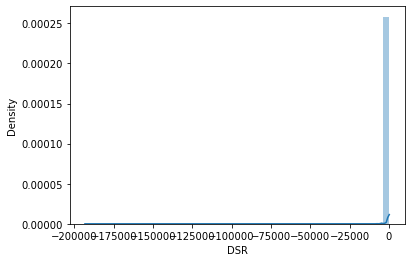

In [61]:
sns.distplot(spec_loan['DSR'])

In [62]:
DSR_NONE = spec_loan.loc[spec_loan['DSR'].isnull()]

In [63]:
DSR_NONE['yearly_income'].value_counts()

0.00000    4013
Name: yearly_income, dtype: int64

In [64]:
DSR_NONE['existing_loan_amt'].value_counts()

0.00000    4013
Name: existing_loan_amt, dtype: int64

In [65]:
spec_loan.loc[spec_loan['DSR'].isnull(),'DSR'] = 0

In [66]:
spec_loan.loc[(spec_loan['DSR']>40) | (spec_loan['existing_loan_amt']>200000000),'regulation'] = 1
spec_loan.loc[(spec_loan['regulation'] != 1),'regulation'] = 0

In [67]:
spec_loan['regulation'].value_counts()

0.00000    643391
1.00000    325361
Name: regulation, dtype: int64

# LOAN 데이터 정제

In [68]:
loan

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.00000,13.60000,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.00000,17.90000,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.00000,18.50000,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.00000,10.80000,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.00000,16.40000,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.00000,14.80000,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.00000,11.80000,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.00000,7.20000,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.00000,13.50000,NaN


In [69]:
loan.describe()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied
count,13527363.00000,13527363.00000,13527363.00000,13519868.00000,13519868.00000,10270124.00000
mean,1083520.40536,32.59900,146.41358,22740950.42940,12.75172,0.05457
std,626051.81874,17.25680,78.66002,72219005.28068,3.84339,0.22714
min,1.00000,1.00000,1.00000,0.00000,1.50000,0.00000
25%,541564.00000,19.00000,71.00000,9000000.00000,9.60000,0.00000
50%,1083953.00000,34.00000,150.00000,18000000.00000,13.20000,0.00000
75%,1625316.00000,46.00000,217.00000,33000000.00000,15.60000,0.00000
max,2167826.00000,64.00000,270.00000,230800000000.00000,20.00000,1.00000


In [70]:
loan.describe()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied
count,13527363.00000,13527363.00000,13527363.00000,13519868.00000,13519868.00000,10270124.00000
mean,1083520.40536,32.59900,146.41358,22740950.42940,12.75172,0.05457
std,626051.81874,17.25680,78.66002,72219005.28068,3.84339,0.22714
min,1.00000,1.00000,1.00000,0.00000,1.50000,0.00000
25%,541564.00000,19.00000,71.00000,9000000.00000,9.60000,0.00000
50%,1083953.00000,34.00000,150.00000,18000000.00000,13.20000,0.00000
75%,1625316.00000,46.00000,217.00000,33000000.00000,15.60000,0.00000
max,2167826.00000,64.00000,270.00000,230800000000.00000,20.00000,1.00000


## loan_rate 구간화 파생변수

In [71]:
loan.loc[(loan['loan_rate'] < 5),'loan_group'] = '1'
loan.loc[(loan['loan_rate'] >= 5) & (loan['loan_rate'] < 10) ,'loan_group'] = '2'
loan.loc[(loan['loan_rate'] >= 10) & (loan['loan_rate'] < 15) ,'loan_group'] = '3'
loan.loc[(loan['loan_rate'] >= 15 ,'loan_group')] = '4'

# 병합

In [72]:
merged = pd.merge(loan , spec_loan, on='application_id',how = 'left')

In [73]:
merged

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,loan_group,user_id,insert_time,...,credit_score_rh_std,credit_score_in_mean,desired_amount_pp_mean,desired_amount_pp_std,yearly_income_in_mean,yearly_income_in_std,yearly_income_em_mean,yearly_income_em_std,DSR,regulation
0,1748340,2022-06-07 13:05:41,7,191,42000000.00000,13.60000,NaN,3,430982.00000,2022-06-01,...,133.27853,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,14.45333,0.00000
1,1748340,2022-06-07 13:05:41,25,169,24000000.00000,17.90000,NaN,4,430982.00000,2022-06-01,...,133.27853,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,14.45333,0.00000
2,1748340,2022-06-07 13:05:41,2,7,24000000.00000,18.50000,NaN,4,430982.00000,2022-06-01,...,133.27853,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,14.45333,0.00000
3,1748340,2022-06-07 13:05:41,4,268,29000000.00000,10.80000,NaN,3,430982.00000,2022-06-01,...,133.27853,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,14.45333,0.00000
4,1748340,2022-06-07 13:05:41,11,118,5000000.00000,16.40000,NaN,4,430982.00000,2022-06-01,...,133.27853,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,14.45333,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.00000,14.80000,NaN,3,478802.00000,2022-06-01,...,123.41245,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,30.81421,0.00000
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.00000,11.80000,NaN,3,478802.00000,2022-06-01,...,123.41245,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,30.81421,0.00000
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.00000,7.20000,NaN,2,478802.00000,2022-06-01,...,123.41245,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,30.81421,0.00000
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.00000,13.50000,NaN,3,478802.00000,2022-06-01,...,123.41245,639.24654,35439648.55675,62368140.45326,33952105.47671,18416148.75806,35502189.81168,20094012.11814,30.81421,0.00000


In [74]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13527363 entries, 0 to 13527362
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   application_id          int64  
 1   loanapply_insert_time   object 
 2   bank_id                 int64  
 3   product_id              int64  
 4   loan_limit              float64
 5   loan_rate               float64
 6   is_applied              float64
 7   loan_group              object 
 8   user_id                 float64
 9   insert_time             object 
 10  credit_score            float64
 11  yearly_income           float64
 12  income_type             object 
 13  employment_type         object 
 14  houseown_type           object 
 15  desired_amount          float64
 16  purpose                 object 
 17  existing_loan_cnt       float64
 18  existing_loan_amt       float64
 19  Month                   float64
 20  app_count               float64
 21  birth_year              float

In [75]:
merged.isnull().sum()

application_id                  0
loanapply_insert_time           0
bank_id                         0
product_id                      0
loan_limit                   7495
loan_rate                    7495
is_applied                3257239
loan_group                   7495
user_id                       119
insert_time                   119
credit_score                  119
yearly_income                 119
income_type                   119
employment_type               119
houseown_type                 119
desired_amount                119
purpose                       119
existing_loan_cnt             119
existing_loan_amt             119
Month                         119
app_count                     119
birth_year                    119
gender                        119
rehab_group                   119
employed_time                 119
KCB_rank                      119
income_ranking                119
credit_score_em_mean          119
credit_score_em_std           119
credit_score_h

# 대출한도, 금리 둘다 결측일 경우 삭제

In [76]:
df = merged[(merged['loan_limit'].isnull()) &(merged['loan_rate'].isnull())]
df_index = df.index
merged = merged.drop(df_index)

In [77]:
merged.isnull().sum()

application_id                  0
loanapply_insert_time           0
bank_id                         0
product_id                      0
loan_limit                      0
loan_rate                       0
is_applied                3255482
loan_group                      0
user_id                         6
insert_time                     6
credit_score                    6
yearly_income                   6
income_type                     6
employment_type                 6
houseown_type                   6
desired_amount                  6
purpose                         6
existing_loan_cnt               6
existing_loan_amt               6
Month                           6
app_count                       6
birth_year                      6
gender                          6
rehab_group                     6
employed_time                   6
KCB_rank                        6
income_ranking                  6
credit_score_em_mean            6
credit_score_em_std             6
credit_score_h

In [78]:
merged1 = merged[merged['user_id'].isnull()]
merged1

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,loan_group,user_id,insert_time,...,credit_score_rh_std,credit_score_in_mean,desired_amount_pp_mean,desired_amount_pp_std,yearly_income_in_mean,yearly_income_in_std,yearly_income_em_mean,yearly_income_em_std,DSR,regulation
4495392,341149,2022-06-30 21:32:20,64,254,45000000.00000,10.30000,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4495394,341149,2022-06-30 21:32:19,13,262,35000000.00000,16.40000,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4495395,341149,2022-06-30 21:32:19,38,113,5000000.00000,19.50000,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4495396,341149,2022-06-30 21:32:19,14,128,15000000.00000,12.50000,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4495399,341149,2022-06-30 21:32:19,29,265,10000000.00000,9.10000,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4495401,341149,2022-06-30 21:32:19,57,71,23000000.00000,15.40000,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
merged = merged.drop(merged1.index)

In [81]:
merged.isnull().sum()

application_id                  0
loanapply_insert_time           0
bank_id                         0
product_id                      0
loan_limit                      0
loan_rate                       0
is_applied                3255476
loan_group                      0
user_id                         0
insert_time                     0
credit_score                    0
yearly_income                   0
income_type                     0
employment_type                 0
houseown_type                   0
desired_amount                  0
purpose                         0
existing_loan_cnt               0
existing_loan_amt               0
Month                           0
app_count                       0
birth_year                      0
gender                          0
rehab_group                     0
employed_time                   0
KCB_rank                        0
income_ranking                  0
credit_score_em_mean            0
credit_score_em_std             0
credit_score_h

# Loan_limit 최대값 조정

In [80]:
limit_max = merged[(merged['loan_limit'] > 100000000)]
limit_max_index = limit_max.index
merged.loc[limit_max_index , ['loan_limit']] = 100000000

# 병합 후 파생변수 생성

## loan_limit, desired_amount 차이

In [87]:
merged['limit_desired_diff'] = merged['loan_limit'] - merged['desired_amount']

In [88]:
merged = merged.drop(['yearly_income', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt'], axis=1)

# app_id 기준 loan_limit, rate

In [89]:
merged_ll = merged.groupby(['application_id'])[['loan_limit', 'loan_rate']].agg(['min','median', 'max'])
merged_ll

loan_limit                               loan_rate  \
                          min         median            max       min   
application_id                                                          
1               8000000.00000 19000000.00000 32000000.00000  14.80000   
2              15000000.00000 15000000.00000 15000000.00000   9.30000   
4              10000000.00000 18000000.00000 26000000.00000  11.40000   
6               3000000.00000 24000000.00000 48000000.00000   9.40000   
8               5000000.00000  5000000.00000 13000000.00000  14.50000   
...                       ...            ...            ...       ...   
2167817         1000000.00000 18000000.00000 35000000.00000  18.40000   
2167819         8000000.00000 30000000.00000 40000000.00000  13.00000   
2167820         4000000.00000 15000000.00000 38000000.00000  13.90000   
2167822        10000000.00000 11000000.00000 11000000.00000  15.60000   
2167826         5000000.00000 20000000.00000 22000000.00000  16.90000   

                                  
                 median      max  
application_id                    
1              17.40000 19.90000  
2               9.30000  9.30000  
4              11.40000 11.40000  
6              14.00000 17.50000  
8              15.90000 19.90000  
...                 ...      ...  
2167817        19.15000 19.90000  
2167819        17.60000 18.60000  
2167820        15.40000 19.10000  
2167822        15.60000 18.30000  
2167826        17.40000 19.90000  

[968726 rows x 6 columns]

In [90]:
merged_ll = merged_ll.reset_index()
merged_ll

application_id     loan_limit                               loan_rate  \
                                 min         median            max       min   
0                   1  8000000.00000 19000000.00000 32000000.00000  14.80000   
1                   2 15000000.00000 15000000.00000 15000000.00000   9.30000   
2                   4 10000000.00000 18000000.00000 26000000.00000  11.40000   
3                   6  3000000.00000 24000000.00000 48000000.00000   9.40000   
4                   8  5000000.00000  5000000.00000 13000000.00000  14.50000   
...               ...            ...            ...            ...       ...   
968721        2167817  1000000.00000 18000000.00000 35000000.00000  18.40000   
968722        2167819  8000000.00000 30000000.00000 40000000.00000  13.00000   
968723        2167820  4000000.00000 15000000.00000 38000000.00000  13.90000   
968724        2167822 10000000.00000 11000000.00000 11000000.00000  15.60000   
968725        2167826  5000000.00000 20000000.00000 22000000.00000  16.90000   

                          
         median      max  
0      17.40000 19.90000  
1       9.30000  9.30000  
2      11.40000 11.40000  
3      14.00000 17.50000  
4      15.90000 19.90000  
...         ...      ...  
968721 19.15000 19.90000  
968722 17.60000 18.60000  
968723 15.40000 19.10000  
968724 15.60000 18.30000  
968725 17.40000 19.90000  

[968726 rows x 7 columns]

In [91]:
merged_ll.columns = ['_app_'.join(x) for x in merged_ll.columns.ravel()]
merged_ll

,application_id_app_,loan_limit_app_min,loan_limit_app_median,loan_limit_app_max,loan_rate_app_min,loan_rate_app_median,loan_rate_app_max
0,1,8000000.00000,19000000.00000,32000000.00000,14.80000,17.40000,19.90000
1,2,15000000.00000,15000000.00000,15000000.00000,9.30000,9.30000,9.30000
2,4,10000000.00000,18000000.00000,26000000.00000,11.40000,11.40000,11.40000
3,6,3000000.00000,24000000.00000,48000000.00000,9.40000,14.00000,17.50000
4,8,5000000.00000,5000000.00000,13000000.00000,14.50000,15.90000,19.90000
...,...,...,...,...,...,...,...
968721,2167817,1000000.00000,18000000.00000,35000000.00000,18.40000,19.15000,19.90000
968722,2167819,8000000.00000,30000000.00000,40000000.00000,13.00000,17.60000,18.60000
968723,2167820,4000000.00000,15000000.00000,38000000.00000,13.90000,15.40000,19.10000
968724,2167822,10000000.00000,11000000.00000,11000000.00000,15.60000,15.60000,18.30000


In [92]:
merged_ll = merged_ll.rename(columns = {'application_id_app_': 'application_id'})

In [93]:
merged = pd.merge(left=merged,right=merged_ll, how='left', on=['application_id'])
merged

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,loan_group,user_id,insert_time,...,yearly_income_em_std,DSR,regulation,limit_desired_diff,loan_limit_app_min,loan_limit_app_median,loan_limit_app_max,loan_rate_app_min,loan_rate_app_median,loan_rate_app_max
0,1748340,2022-06-07 13:05:41,7,191,42000000.00000,13.60000,NaN,3,430982.00000,2022-06-01,...,20094012.11814,14.45333,0.00000,17000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000
1,1748340,2022-06-07 13:05:41,25,169,24000000.00000,17.90000,NaN,4,430982.00000,2022-06-01,...,20094012.11814,14.45333,0.00000,-1000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000
2,1748340,2022-06-07 13:05:41,2,7,24000000.00000,18.50000,NaN,4,430982.00000,2022-06-01,...,20094012.11814,14.45333,0.00000,-1000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000
3,1748340,2022-06-07 13:05:41,4,268,29000000.00000,10.80000,NaN,3,430982.00000,2022-06-01,...,20094012.11814,14.45333,0.00000,4000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000
4,1748340,2022-06-07 13:05:41,11,118,5000000.00000,16.40000,NaN,4,430982.00000,2022-06-01,...,20094012.11814,14.45333,0.00000,-20000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519857,1428218,2022-06-03 12:01:58,62,200,3000000.00000,14.80000,NaN,3,478802.00000,2022-06-01,...,20094012.11814,30.81421,0.00000,-47000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000
13519858,1428218,2022-06-03 12:01:49,2,7,40000000.00000,11.80000,NaN,3,478802.00000,2022-06-01,...,20094012.11814,30.81421,0.00000,-10000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000
13519859,1428218,2022-06-03 12:01:48,32,257,15000000.00000,7.20000,NaN,2,478802.00000,2022-06-01,...,20094012.11814,30.81421,0.00000,-35000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000
13519860,1428218,2022-06-03 12:01:48,33,110,44000000.00000,13.50000,NaN,3,478802.00000,2022-06-01,...,20094012.11814,30.81421,0.00000,-6000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000


In [94]:
del(merged_ll)

# Purpose기준 loan_limit_rate

In [95]:
merged_pp = merged.groupby(['purpose'])[['loan_limit']].agg(['max'])
merged_pp

,loan_limit
,max
purpose,
BUSINESS,100000000.00000
BUYCAR,100000000.00000
BUYHOUSE,100000000.00000
ETC,100000000.00000
HOUSEDEPOSIT,100000000.00000
INVEST,100000000.00000
LIVING,100000000.00000
SWITCHLOAN,100000000.00000


In [96]:
merged_pp = merged_pp.reset_index()
merged_pp

,purpose,loan_limit
,,max
0,BUSINESS,100000000.00000
1,BUYCAR,100000000.00000
2,BUYHOUSE,100000000.00000
3,ETC,100000000.00000
4,HOUSEDEPOSIT,100000000.00000
5,INVEST,100000000.00000
6,LIVING,100000000.00000
7,SWITCHLOAN,100000000.00000


In [97]:
merged_pp.columns = ['_pp_'.join(x) for x in merged_pp.columns.ravel()]
merged_pp

,purpose_pp_,loan_limit_pp_max
0,BUSINESS,100000000.00000
1,BUYCAR,100000000.00000
2,BUYHOUSE,100000000.00000
3,ETC,100000000.00000
4,HOUSEDEPOSIT,100000000.00000
5,INVEST,100000000.00000
6,LIVING,100000000.00000
7,SWITCHLOAN,100000000.00000


In [98]:
merged_pp = merged_pp.rename(columns = {'purpose_pp_': 'purpose'})

In [99]:
merged = pd.merge(left=merged,right=merged_pp, how='left', on=['purpose'])
merged

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,loan_group,user_id,insert_time,...,DSR,regulation,limit_desired_diff,loan_limit_app_min,loan_limit_app_median,loan_limit_app_max,loan_rate_app_min,loan_rate_app_median,loan_rate_app_max,loan_limit_pp_max
0,1748340,2022-06-07 13:05:41,7,191,42000000.00000,13.60000,NaN,3,430982.00000,2022-06-01,...,14.45333,0.00000,17000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000
1,1748340,2022-06-07 13:05:41,25,169,24000000.00000,17.90000,NaN,4,430982.00000,2022-06-01,...,14.45333,0.00000,-1000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000
2,1748340,2022-06-07 13:05:41,2,7,24000000.00000,18.50000,NaN,4,430982.00000,2022-06-01,...,14.45333,0.00000,-1000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000
3,1748340,2022-06-07 13:05:41,4,268,29000000.00000,10.80000,NaN,3,430982.00000,2022-06-01,...,14.45333,0.00000,4000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000
4,1748340,2022-06-07 13:05:41,11,118,5000000.00000,16.40000,NaN,4,430982.00000,2022-06-01,...,14.45333,0.00000,-20000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519857,1428218,2022-06-03 12:01:58,62,200,3000000.00000,14.80000,NaN,3,478802.00000,2022-06-01,...,30.81421,0.00000,-47000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000
13519858,1428218,2022-06-03 12:01:49,2,7,40000000.00000,11.80000,NaN,3,478802.00000,2022-06-01,...,30.81421,0.00000,-10000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000
13519859,1428218,2022-06-03 12:01:48,32,257,15000000.00000,7.20000,NaN,2,478802.00000,2022-06-01,...,30.81421,0.00000,-35000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000
13519860,1428218,2022-06-03 12:01:48,33,110,44000000.00000,13.50000,NaN,3,478802.00000,2022-06-01,...,30.81421,0.00000,-6000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000


In [100]:
del(merged_pp)

# bank_id별 rate 평균

In [101]:
merged_bank = merged.groupby(['bank_id'])[['loan_rate']].agg(['mean'])
merged_bank

,loan_rate
,mean
bank_id,
1,12.18090
2,13.96369
3,16.30026
4,8.38881
5,12.48140
...,...
60,5.56357
61,13.85506


In [102]:
merged_bank = merged_bank.reset_index()
merged_bank

,bank_id,loan_rate
,,mean
0,1,12.18090
1,2,13.96369
2,3,16.30026
3,4,8.38881
4,5,12.48140
...,...,...
58,60,5.56357
59,61,13.85506
60,62,9.65302


In [103]:
merged_bank.columns = ['_bank_'.join(x) for x in merged_bank.columns.ravel()]
merged_bank

,bank_id_bank_,loan_rate_bank_mean
0,1,12.18090
1,2,13.96369
2,3,16.30026
3,4,8.38881
4,5,12.48140
...,...,...
58,60,5.56357
59,61,13.85506
60,62,9.65302
61,63,13.44085


In [104]:
merged_bank = merged_bank.rename(columns = {'bank_id_bank_': 'bank_id'})

In [105]:
merged = pd.merge(left=merged,right=merged_bank, how='left', on=['bank_id'])
merged

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,loan_group,user_id,insert_time,...,regulation,limit_desired_diff,loan_limit_app_min,loan_limit_app_median,loan_limit_app_max,loan_rate_app_min,loan_rate_app_median,loan_rate_app_max,loan_limit_pp_max,loan_rate_bank_mean
0,1748340,2022-06-07 13:05:41,7,191,42000000.00000,13.60000,NaN,3,430982.00000,2022-06-01,...,0.00000,17000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000,13.41783
1,1748340,2022-06-07 13:05:41,25,169,24000000.00000,17.90000,NaN,4,430982.00000,2022-06-01,...,0.00000,-1000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000,15.67980
2,1748340,2022-06-07 13:05:41,2,7,24000000.00000,18.50000,NaN,4,430982.00000,2022-06-01,...,0.00000,-1000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000,13.96369
3,1748340,2022-06-07 13:05:41,4,268,29000000.00000,10.80000,NaN,3,430982.00000,2022-06-01,...,0.00000,4000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000,8.38881
4,1748340,2022-06-07 13:05:41,11,118,5000000.00000,16.40000,NaN,4,430982.00000,2022-06-01,...,0.00000,-20000000.00000,1000000.00000,23000000.00000,50000000.00000,8.10000,14.80000,19.70000,100000000.00000,15.51000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519857,1428218,2022-06-03 12:01:58,62,200,3000000.00000,14.80000,NaN,3,478802.00000,2022-06-01,...,0.00000,-47000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000,9.65302
13519858,1428218,2022-06-03 12:01:49,2,7,40000000.00000,11.80000,NaN,3,478802.00000,2022-06-01,...,0.00000,-10000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000,13.96369
13519859,1428218,2022-06-03 12:01:48,32,257,15000000.00000,7.20000,NaN,2,478802.00000,2022-06-01,...,0.00000,-35000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000,13.22326
13519860,1428218,2022-06-03 12:01:48,33,110,44000000.00000,13.50000,NaN,3,478802.00000,2022-06-01,...,0.00000,-6000000.00000,1000000.00000,15000000.00000,45000000.00000,6.60000,12.60000,19.90000,100000000.00000,11.32243


In [106]:
del(merged_bank)

# product_id기준 limit, rate

In [107]:
merged_porduct = merged.groupby(['product_id'])[['loan_rate', 'loan_limit']].agg(['min', 'mean', 'max'])
merged_porduct

loan_rate                      loan_limit                 \
                 min     mean      max           min           mean   
product_id                                                            
1            4.80000 10.68707 16.90000       0.00000 25837137.39415   
5            1.50000 16.25510 19.90000 1000000.00000 15881652.13517   
7            9.90000 13.93717 19.90000 5000000.00000 34089151.46549   
8            5.90000 13.78109 16.90000 1000000.00000 18979059.09548   
12           7.90000 13.57932 19.90000 2000000.00000 18980656.39897   
...              ...      ...      ...           ...            ...   
265          5.00000  7.93867 13.60000 3000000.00000 24960960.41351   
266          9.90000 11.93292 19.90000 1000000.00000 20342352.66046   
267          5.90000 12.47386 19.90000 1000000.00000 30868366.56504   
268          3.60000  8.47507 15.00000 1000000.00000 26039653.01003   
270          3.30000  6.27510 14.80000 1000000.00000 29128069.03591   

                            
                       max  
product_id                  
1          100000000.00000  
5           45000000.00000  
7           60000000.00000  
8           70000000.00000  
12          50000000.00000  
...                    ...  
265        100000000.00000  
266         60000000.00000  
267        100000000.00000  
268        100000000.00000  
270        100000000.00000  

[171 rows x 6 columns]

In [108]:
merged_porduct = merged_porduct.reset_index()
merged_porduct

product_id loan_rate                      loan_limit                 \
                     min     mean      max           min           mean   
0            1   4.80000 10.68707 16.90000       0.00000 25837137.39415   
1            5   1.50000 16.25510 19.90000 1000000.00000 15881652.13517   
2            7   9.90000 13.93717 19.90000 5000000.00000 34089151.46549   
3            8   5.90000 13.78109 16.90000 1000000.00000 18979059.09548   
4           12   7.90000 13.57932 19.90000 2000000.00000 18980656.39897   
..         ...       ...      ...      ...           ...            ...   
166        265   5.00000  7.93867 13.60000 3000000.00000 24960960.41351   
167        266   9.90000 11.93292 19.90000 1000000.00000 20342352.66046   
168        267   5.90000 12.47386 19.90000 1000000.00000 30868366.56504   
169        268   3.60000  8.47507 15.00000 1000000.00000 26039653.01003   
170        270   3.30000  6.27510 14.80000 1000000.00000 29128069.03591   

                     
                max  
0   100000000.00000  
1    45000000.00000  
2    60000000.00000  
3    70000000.00000  
4    50000000.00000  
..              ...  
166 100000000.00000  
167  60000000.00000  
168 100000000.00000  
169 100000000.00000  
170 100000000.00000  

[171 rows x 7 columns]

In [109]:
merged_porduct.columns = ['_product_'.join(x) for x in merged_porduct.columns.ravel()]
merged_porduct

,product_id_product_,loan_rate_product_min,loan_rate_product_mean,loan_rate_product_max,loan_limit_product_min,loan_limit_product_mean,loan_limit_product_max
0,1,4.80000,10.68707,16.90000,0.00000,25837137.39415,100000000.00000
1,5,1.50000,16.25510,19.90000,1000000.00000,15881652.13517,45000000.00000
2,7,9.90000,13.93717,19.90000,5000000.00000,34089151.46549,60000000.00000
3,8,5.90000,13.78109,16.90000,1000000.00000,18979059.09548,70000000.00000
4,12,7.90000,13.57932,19.90000,2000000.00000,18980656.39897,50000000.00000
...,...,...,...,...,...,...,...
166,265,5.00000,7.93867,13.60000,3000000.00000,24960960.41351,100000000.00000
167,266,9.90000,11.93292,19.90000,1000000.00000,20342352.66046,60000000.00000
168,267,5.90000,12.47386,19.90000,1000000.00000,30868366.56504,100000000.00000
169,268,3.60000,8.47507,15.00000,1000000.00000,26039653.01003,100000000.00000


In [110]:
merged_porduct = merged_porduct.rename(columns = {'product_id_product_': 'product_id'})

In [111]:
merged = pd.merge(left=merged,right=merged_porduct, how='left', on=['product_id'])
merged

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,loan_group,user_id,insert_time,...,loan_rate_app_median,loan_rate_app_max,loan_limit_pp_max,loan_rate_bank_mean,loan_rate_product_min,loan_rate_product_mean,loan_rate_product_max,loan_limit_product_min,loan_limit_product_mean,loan_limit_product_max
0,1748340,2022-06-07 13:05:41,7,191,42000000.00000,13.60000,NaN,3,430982.00000,2022-06-01,...,14.80000,19.70000,100000000.00000,13.41783,8.20000,13.39072,17.70000,1000000.00000,30627736.14963,100000000.00000
1,1748340,2022-06-07 13:05:41,25,169,24000000.00000,17.90000,NaN,4,430982.00000,2022-06-01,...,14.80000,19.70000,100000000.00000,15.67980,14.90000,18.07954,19.90000,2000000.00000,24126931.17810,65000000.00000
2,1748340,2022-06-07 13:05:41,2,7,24000000.00000,18.50000,NaN,4,430982.00000,2022-06-01,...,14.80000,19.70000,100000000.00000,13.96369,9.90000,13.93717,19.90000,5000000.00000,34089151.46549,60000000.00000
3,1748340,2022-06-07 13:05:41,4,268,29000000.00000,10.80000,NaN,3,430982.00000,2022-06-01,...,14.80000,19.70000,100000000.00000,8.38881,3.60000,8.47507,15.00000,1000000.00000,26039653.01003,100000000.00000
4,1748340,2022-06-07 13:05:41,11,118,5000000.00000,16.40000,NaN,4,430982.00000,2022-06-01,...,14.80000,19.70000,100000000.00000,15.51000,15.30000,17.27405,20.00000,1000000.00000,26792977.25776,50000000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519857,1428218,2022-06-03 12:01:58,62,200,3000000.00000,14.80000,NaN,3,478802.00000,2022-06-01,...,12.60000,19.90000,100000000.00000,9.65302,6.90000,11.00165,15.50000,0.00000,21513769.65906,50000000.00000
13519858,1428218,2022-06-03 12:01:49,2,7,40000000.00000,11.80000,NaN,3,478802.00000,2022-06-01,...,12.60000,19.90000,100000000.00000,13.96369,9.90000,13.93717,19.90000,5000000.00000,34089151.46549,60000000.00000
13519859,1428218,2022-06-03 12:01:48,32,257,15000000.00000,7.20000,NaN,2,478802.00000,2022-06-01,...,12.60000,19.90000,100000000.00000,13.22326,7.20000,7.28099,7.80000,2000000.00000,12640105.78253,20000000.00000
13519860,1428218,2022-06-03 12:01:48,33,110,44000000.00000,13.50000,NaN,3,478802.00000,2022-06-01,...,12.60000,19.90000,100000000.00000,11.32243,5.90000,13.49409,19.10000,5000000.00000,26176317.97039,80000000.00000


In [112]:
del(merged_porduct)

In [113]:
merged.columns

Index(['application_id', 'loanapply_insert_time', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied', 'loan_group', 'user_id',
       'insert_time', 'credit_score', 'income_type', 'employment_type',
       'houseown_type', 'purpose', 'Month', 'app_count', 'birth_year',
       'gender', 'rehab_group', 'employed_time', 'KCB_rank', 'income_ranking',
       'credit_score_em_mean', 'credit_score_em_std', 'credit_score_hm_mean',
       'credit_score_hm_std', 'credit_score_rh_mean', 'credit_score_rh_std',
       'credit_score_in_mean', 'desired_amount_pp_mean',
       'desired_amount_pp_std', 'yearly_income_in_mean',
       'yearly_income_in_std', 'yearly_income_em_mean', 'yearly_income_em_std',
       'DSR', 'regulation', 'limit_desired_diff', 'loan_limit_app_min',
       'loan_limit_app_median', 'loan_limit_app_max', 'loan_rate_app_min',
       'loan_rate_app_median', 'loan_rate_app_max', 'loan_limit_pp_max',
       'loan_rate_bank_mean', 'loan_rate_product_min',
      

# loan_limit 로그변환

In [114]:
merged['loan_limit'] = np.log1p(merged['loan_limit'])

In [116]:
merged.isnull().sum()

application_id                   0
loanapply_insert_time            0
bank_id                          0
product_id                       0
loan_limit                       0
loan_rate                        0
is_applied                 3255476
loan_group                       0
user_id                          0
insert_time                      0
credit_score                     0
income_type                      0
employment_type                  0
houseown_type                    0
purpose                          0
Month                            0
app_count                        0
birth_year                       0
gender                           0
rehab_group                      0
employed_time                    0
KCB_rank                         0
income_ranking                   0
credit_score_em_mean             0
credit_score_em_std              0
credit_score_hm_mean             0
credit_score_hm_std              0
credit_score_rh_mean             0
credit_score_rh_std 

In [117]:
merged.to_csv('C:/data/merged.csv', encoding = 'cp949')